# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn

import warnings
warnings.simplefilter("ignore")


In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

pd.set_option('display.max_columns', None)

df.info()
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Отлично, что ты увеличиваешь лимит для отображаемых столбцов, чтобы было видно всю таблицу
</div>

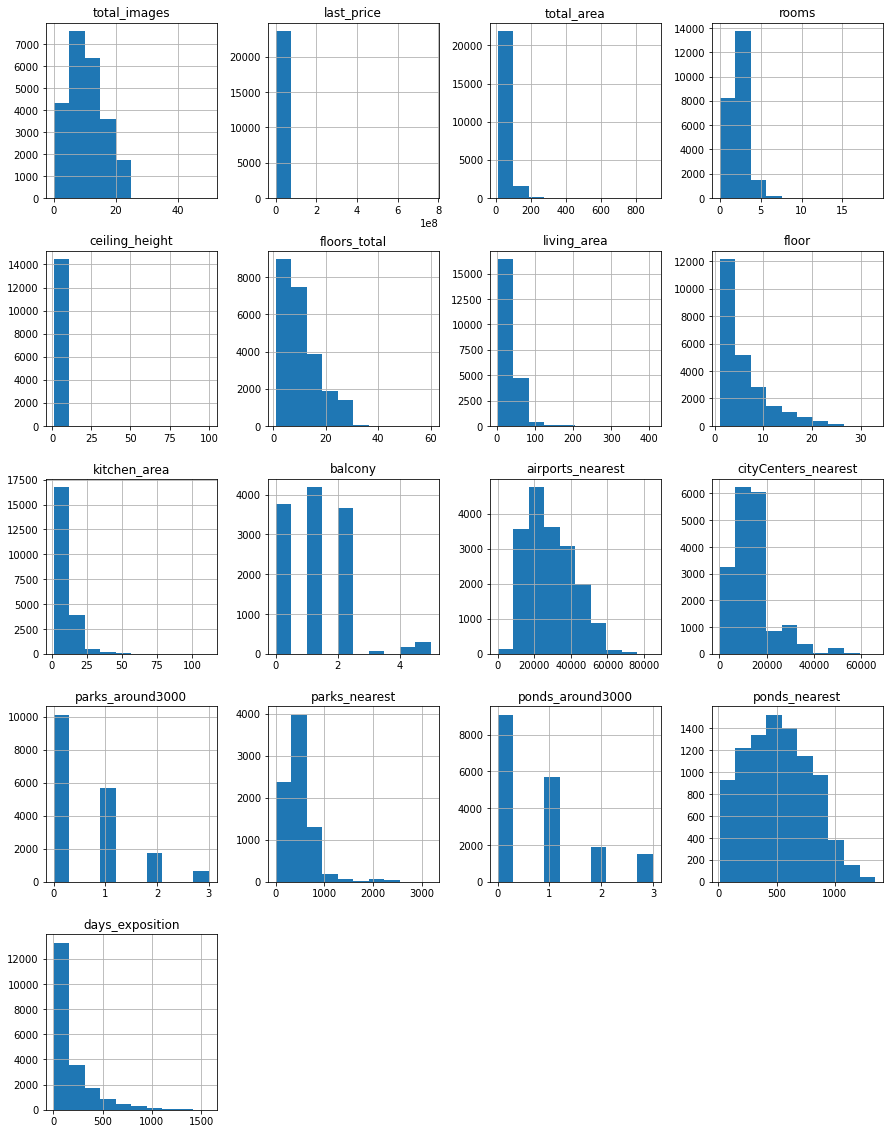

In [3]:
df.hist(figsize = (15,20));

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Графики построено верно! 
</div>

### Предобработка данных

In [4]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [6]:
df[df['ceiling_height'] == 100]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,100.0,5.0,14.0,5,True,False,False,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


In [7]:
df[df['floors_total'] == 60]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2253,12,3800000.0,45.5,2018-06-28T00:00:00,2,2.88,60.0,27.4,4,NaN,False,False,7.4,NaN,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0


Вывод: есть данные которые не очень понятны, например: ceiling_height(высота потолков)максимальная высота 100 м, так же непонята максимальная этажность (60) в городе Кронштадт.

Для начала переименуем некоторые столбцы для удобства:

In [8]:
df = df.rename(columns = {'cityCenters_nearest': 'city_centers_nearest', 
                         'parks_around3000': 'parks_around_3000',
                         'ponds_around3000': 'pond_around_3000'})
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,pond_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Молодец! Так датафрейм будет более аккуратным
</div>

In [9]:
df.duplicated().sum()

0

Теперь проверим наименование городов 

In [10]:
df['locality_name'].value_counts()

Санкт-Петербург                  15721
посёлок Мурино                     522
посёлок Шушары                     440
Всеволожск                         398
Пушкин                             369
                                 ...  
поселок Калитино                     1
коттеджный поселок Счастье           1
поселок Ромашки                      1
деревня Пчева                        1
поселок Пансионат Зелёный Бор        1
Name: locality_name, Length: 364, dtype: int64

In [11]:
df['locality_name'].sort_values(ascending=False).unique()

array(['село Шум', 'село Старая Ладога', 'село Русско-Высоцкое',
       'село Рождествено', 'село Путилово', 'село Паша', 'село Павлово',
       'село Никольское', 'село Копорье', 'садовое товарищество Садко',
       'садовое товарищество Рахья', 'садовое товарищество Приладожский',
       'садовое товарищество Новая Ропша',
       'садоводческое некоммерческое товарищество Лесная Поляна',
       'посёлок станции Свирь', 'посёлок станции Громово',
       'посёлок при железнодорожной станции Приветнинское',
       'посёлок при железнодорожной станции Вещево',
       'посёлок городского типа имени Свердлова',
       'посёлок городского типа имени Морозова',
       'посёлок городского типа Форносово',
       'посёлок городского типа Ульяновка',
       'посёлок городского типа Токсово', 'посёлок городского типа Тайцы',
       'посёлок городского типа Сиверский',
       'посёлок городского типа Рябово', 'посёлок городского типа Рощино',
       'посёлок городского типа Павлово', 'посёлок гор

In [12]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')
df['locality_name'] = df['locality_name'].replace('поселок городского типа Рябово', 'поселок Рябово')
df['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Супер! Здесь всё верно)
</div>

In [13]:
df['locality_name'].isna().sum()

49

Удаляем пропущенные значения.

In [14]:
df= df.dropna(subset=['locality_name'])
df['locality_name'].isna().sum()

0

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Удалить пропуски в столбце locality_name - это хорошее решение. 
</div>

Проверим пропущенные значения в 'is_apartment'

In [15]:
df['is_apartment'].isna().sum()

20890

In [16]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'].isna().sum()

0

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👌
</div>

Возможно, в данном столбце были пропущенные значения из-за человеческой ошибки.

Так же поменяеми тип данных

In [17]:
df['is_apartment'] = df['is_apartment'].astype('bool')
df['is_apartment'].value_counts()

False    23600
True        50
Name: is_apartment, dtype: int64

Теперь посмотрим пропущенные значения в balcony

In [18]:
df['balcony'].isna().sum()

11513

Заменим пропущенные значения на 0.0, так как возможно балконы отсутствуют.

In [19]:
df['balcony'] = df['balcony'].fillna(0.0)
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9160
floors_total               85
living_area              1898
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
city_centers_nearest     5511
parks_around_3000        5510
parks_nearest           15586
pond_around_3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👌
</div>

Посмотрим на total_images

<AxesSubplot:>

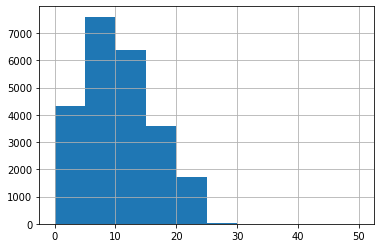

In [20]:
df['total_images'].hist()

есть объявления без фотографий, можно посмотреть сколько их

In [21]:
sum(df['total_images'] == 0)

1058

In [22]:
df.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,pond_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,False,False,False,11.00,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,False,False,False,9.10,0.0,городской поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,False,False,False,14.40,1.0,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,False,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,False,False,False,8.81,0.0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Посмотрим на last_price

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,pond_around_3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,False,False,False,11.00,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,False,False,False,9.10,0.0,городской поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,False,False,False,14.40,1.0,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,False,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,False,False,False,8.81,0.0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


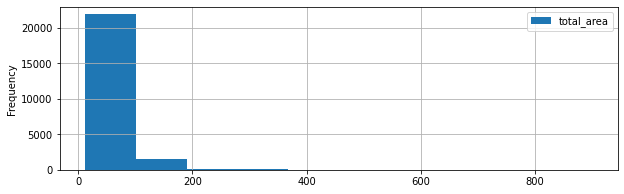

In [23]:
df.plot(x='last_price',y='total_area',kind = 'hist',grid= True, figsize= (10,3))
df['last_price']= df['last_price'].astype(int)
df.head(20)

Посмотрим на 'first_day_exposition', изменим тип данных на datetime

In [24]:
df['first_day_exposition']= pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

Посмотрим за какой период у нас есть данные:

Timestamp('2014-11-27 00:00:00')

Timestamp('2019-05-03 00:00:00')

<AxesSubplot:>

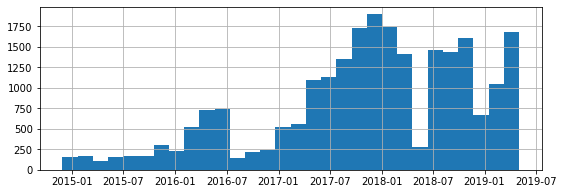

In [25]:
display(df['first_day_exposition'].min(), df['first_day_exposition'].max())
df['first_day_exposition'].hist(bins = 30,figsize = (9,3))
                                                                            

По графику видно что увеличение размещения началось с Июня 2017 года. Почему то был спад в Июне 2018 года.

Разделим на день,месяц и год и добавим новые столбцы.


In [26]:
df['day_of_week_exposition'] = df['first_day_exposition'].dt.day_name()
df['month_exposition'] = df['first_day_exposition'].dt.month_name()
df['year_exposition'] = df['first_day_exposition'].dt.year
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,pond_around_3000,ponds_nearest,days_exposition,day_of_week_exposition,month_exposition,year_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Thursday,March,2019
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,False,False,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Tuesday,December,2018
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Thursday,August,2015
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Friday,July,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Tuesday,June,2018


In [27]:
df['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [28]:
df['days_exposition'].isna().value_counts()

False    20470
True      3180
Name: days_exposition, dtype: int64

Возможно что пропущенные значения это - актуальные объявления. Заменим пропущенные значения на 0.0 .

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

Посмотрим на 'rooms'

In [29]:
df['rooms'].describe()

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [30]:
df['rooms'].isna().sum()

0

<AxesSubplot:>

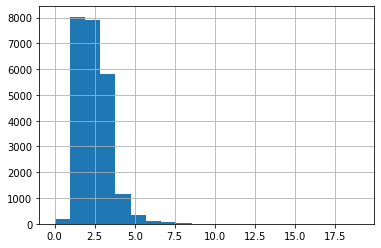

In [31]:
df['rooms'].hist(bins=20)

In [32]:
sum(df['rooms']== 0)

197

In [33]:
df.pivot_table(index = 'rooms', values = ['open_plan', 'studio'], aggfunc= 'sum')

,open_plan,studio
rooms,,
0,59,138
1,3,11
2,1,0
3,2,0
4,1,0
5,1,0
6,0,0
7,0,0
8,0,0


Меня заинтересовал вопрос, почему в графике есть жилье с 0 комнатами, оказывавется это в основном Студия и Открытая планировка, все нормально.

Посмотрим что у нас в столбце 'ceiling_height'

In [34]:
df['ceiling_height'].describe()

count    14490.000000
mean         2.771287
std          1.261593
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [35]:
df['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [36]:
for index, row in df.iterrows():
    if row['ceiling_height'] > 10.3:
        row['ceiling_height'] / 10
    elif row['ceiling_height'] < 2:
        df = df.drop(index)

In [37]:
df['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [38]:
for i in df['ceiling_height']:
     if i >= 9:
         df['ceiling_height'] = df['ceiling_height'].replace({i: i/10})

In [39]:
df['ceiling_height'].unique()

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,
        2.59,  2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,
        3.55,  3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,
        5.  ,  2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,
        4.7 ,  2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,
        2.3 ,  3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,
        3.95,  3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,
        3.24,  4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,
        3.09,  8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,
        2.68,  3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,
        3.32,  8.3 ,

изменили аномальные значения, возможно была ошибочка при заполнении

Создадим отдельный столбец для этажей

In [40]:
def floor_status(row):
    if row ['floor'] == 1:
        return 'первый'
    elif row ['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'


In [41]:
df['floor_status'] = df.apply(floor_status,axis=1)
df.sample(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,pond_around_3000,ponds_nearest,days_exposition,day_of_week_exposition,month_exposition,year_exposition,floor_status
7218,1,4280000,66.0,2017-12-01,2,NaN,25.0,35.0,9,False,False,False,12.0,0.0,поселок Шушары,13908.0,19694.0,0.0,NaN,1.0,645.0,211.0,Friday,December,2017,другой
4111,12,12000000,55.7,2017-08-02,3,3.00,6.0,36.0,6,False,False,False,NaN,1.0,Санкт-Петербург,24117.0,4526.0,1.0,473.0,0.0,NaN,69.0,Wednesday,August,2017,последний
8081,14,4200000,58.0,2018-03-28,1,NaN,3.0,38.2,1,False,False,False,5.0,0.0,Красное Село,25000.0,28425.0,2.0,303.0,0.0,NaN,296.0,Wednesday,March,2018,первый
2227,11,3400000,37.0,2017-05-12,1,NaN,9.0,16.0,1,False,False,False,10.0,2.0,Санкт-Петербург,13557.0,12353.0,0.0,NaN,0.0,NaN,111.0,Friday,May,2017,первый
14061,9,2630000,42.0,2018-02-01,1,2.65,13.0,20.0,11,False,False,False,9.0,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,58.0,Thursday,February,2018,другой
17053,9,4700000,45.5,2018-03-14,2,2.50,9.0,28.5,5,False,False,False,7.5,2.0,Санкт-Петербург,51699.0,17073.0,0.0,NaN,0.0,NaN,18.0,Wednesday,March,2018,другой
23589,20,2100000,52.6,2018-03-16,2,2.50,4.0,29.2,2,False,False,False,7.4,0.0,село Копорье,NaN,NaN,NaN,NaN,NaN,NaN,139.0,Friday,March,2018,другой
8590,0,4400000,49.3,2017-11-23,2,NaN,12.0,31.0,11,False,False,False,7.0,1.0,Санкт-Петербург,32642.0,11716.0,1.0,535.0,0.0,NaN,45.0,Thursday,November,2017,другой
806,3,7520000,68.2,2017-12-13,2,NaN,28.0,35.7,5,False,False,False,10.7,0.0,Санкт-Петербург,48847.0,16685.0,0.0,NaN,0.0,NaN,NaN,Wednesday,December,2017,другой
14838,20,8500000,65.1,2018-06-11,2,NaN,22.0,34.8,22,False,False,False,10.9,1.0,Санкт-Петербург,35257.0,14772.0,0.0,NaN,1.0,865.0,177.0,Monday,June,2018,последний


Создадим отдельный столбец для рассчета суммы за м/кв

In [42]:
df['price_for_m'] = df['last_price'] / df['total_area']
df['price_for_m'] = df['price_for_m'].round(decimals=2)
df.sample(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,pond_around_3000,ponds_nearest,days_exposition,day_of_week_exposition,month_exposition,year_exposition,floor_status,price_for_m
11163,6,3600000,29.00,2019-04-15,1,2.55,9.0,15.15,5,False,False,False,6.6,0.0,Санкт-Петербург,12342.0,14933.0,0.0,NaN,1.0,774.0,6.0,Monday,April,2019,другой,124137.93
13351,5,9900000,108.00,2017-05-10,4,NaN,21.0,NaN,6,False,False,False,NaN,2.0,Санкт-Петербург,36579.0,9092.0,0.0,NaN,1.0,454.0,140.0,Wednesday,May,2017,другой,91666.67
20974,13,6600000,62.00,2017-11-24,2,NaN,5.0,38.00,2,False,False,False,7.5,0.0,Санкт-Петербург,39508.0,11211.0,0.0,NaN,0.0,NaN,33.0,Friday,November,2017,другой,106451.61
2648,9,4000000,39.60,2017-02-21,1,2.60,12.0,20.30,11,False,False,False,8.0,0.0,Санкт-Петербург,34330.0,11971.0,0.0,NaN,0.0,NaN,43.0,Tuesday,February,2017,другой,101010.10
18495,13,4150000,49.00,2016-03-20,4,2.55,5.0,37.00,4,False,False,False,5.5,0.0,Санкт-Петербург,12671.0,12470.0,1.0,204.0,0.0,NaN,218.0,Sunday,March,2016,другой,84693.88
22833,17,6270000,61.05,2017-11-22,2,NaN,25.0,31.80,17,False,False,False,12.0,1.0,Санкт-Петербург,35055.0,16219.0,0.0,NaN,1.0,818.0,48.0,Wednesday,November,2017,другой,102702.70
19037,10,3650000,28.00,2016-06-23,1,NaN,14.0,21.00,3,False,False,False,NaN,0.0,Санкт-Петербург,33726.0,12407.0,0.0,NaN,0.0,NaN,97.0,Thursday,June,2016,другой,130357.14
1514,3,3600000,66.90,2019-04-12,3,NaN,5.0,41.70,2,False,False,False,8.5,0.0,Новая Ладога,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday,April,2019,другой,53811.66
15346,6,5690000,56.70,2015-02-19,2,NaN,16.0,31.60,15,False,False,False,12.1,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,505.0,Thursday,February,2015,другой,100352.73
3573,2,7150000,63.00,2017-11-10,2,2.70,20.0,34.30,6,False,False,False,10.8,2.0,Санкт-Петербург,36772.0,11925.0,0.0,NaN,2.0,902.0,62.0,Friday,November,2017,другой,113492.06


Переведем некоторые столбцы из м в км

In [43]:
df['city_centers_nearest'] = df['city_centers_nearest']/1000
df['city_centers_nearest'] = df['city_centers_nearest'].round(decimals=2)
df['airports_nearest'] = df['airports_nearest']/1000
df['airports_nearest']=df['airports_nearest'].round(decimals = 2)
df.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,pond_around_3000,ponds_nearest,days_exposition,day_of_week_exposition,month_exposition,year_exposition,floor_status,price_for_m
10635,3,2680000,28.4,2018-08-06,1,2.70,17.0,17.3,14,False,False,False,NaN,0.0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.0,Monday,August,2018,другой,94366.20
19512,15,5970000,69.0,2018-08-20,2,2.80,27.0,37.0,3,False,False,False,13.5,2.0,Санкт-Петербург,22.31,24.05,0.0,NaN,2.0,423.0,78.0,Monday,August,2018,другой,86521.74
19215,11,3350000,30.9,2015-11-27,1,NaN,9.0,15.4,6,False,False,False,8.1,0.0,Санкт-Петербург,41.43,11.56,2.0,11.0,0.0,NaN,559.0,Friday,November,2015,другой,108414.24
1668,9,4250000,45.0,2018-02-01,2,2.56,5.0,29.0,1,False,False,False,7.0,0.0,Санкт-Петербург,15.06,13.60,1.0,870.0,1.0,720.0,342.0,Thursday,February,2018,первый,94444.44
21488,11,1650000,58.0,2018-01-12,3,2.50,5.0,NaN,5,False,False,False,NaN,0.0,деревня Батово,NaN,NaN,NaN,NaN,NaN,NaN,45.0,Friday,January,2018,последний,28448.28
11679,9,8450000,81.2,2019-02-07,3,2.65,17.0,47.1,3,False,False,False,11.3,0.0,Санкт-Петербург,36.24,16.54,0.0,NaN,3.0,485.0,NaN,Thursday,February,2019,другой,104064.04
19813,11,5700000,55.0,2015-08-13,2,3.00,3.0,31.5,3,False,False,False,15.0,1.0,Санкт-Петербург,32.05,9.13,1.0,590.0,0.0,NaN,487.0,Thursday,August,2015,последний,103636.36
14454,9,7750000,71.0,2019-02-21,3,2.80,4.0,42.5,2,False,False,False,10.0,0.0,Сестрорецк,54.15,35.25,0.0,NaN,0.0,NaN,NaN,Thursday,February,2019,другой,109154.93
11152,4,2800000,36.7,2017-04-01,1,2.57,9.0,17.8,5,False,False,False,8.4,1.0,Петергоф,45.96,34.42,1.0,589.0,0.0,NaN,424.0,Saturday,April,2017,другой,76294.28
23463,10,3800000,40.7,2017-07-21,1,2.57,27.0,15.0,18,False,False,False,11.7,2.0,поселок Парголово,53.15,19.32,0.0,NaN,0.0,NaN,30.0,Friday,July,2017,другой,93366.09


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Все необходимые колонки добавлены. Идём дальше)
</div>

# Проведите исследовательский анализ данных

### Проведите исследовательский анализ данных

Изучите перечисленные ниже параметры объектов и постройте отдельные гистограммы для каждого из этих параметров. В некоторых параметрах встречаются редкие и выбивающиеся значения. При построении гистограмм удалите их. Например, в столбце ceiling_height может быть указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. Попробуйте обработать аномалии в этом и других столбцах, если они есть. Если природа аномалии понятна и данные действительно искажены, то восстановите    корректное значение. В противном случае удалите редкие и выбивающиеся значения.
Список параметров:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего парка

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

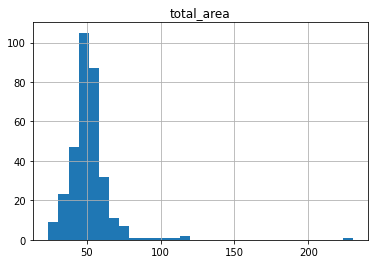

In [44]:
total_area_stat = df.pivot_table(index = 'locality_name', values = 'total_area',aggfunc='mean')
total_area_stat.sort_values(by='total_area',ascending=False).hist(bins=30)

Согласно графику, видно что есть аномальная квадратура по некоторым объявленниям, посмотрим на самые мелкие и крупные квадратуры

In [45]:
df['total_area'].min(),df['total_area'].max()

(12.0, 900.0)

In [46]:
sample = df.query('total_area <= 250 and total_area >= 19')
len(sample)

23511

AxesSubplot(0.125,0.125;0.775x0.755)


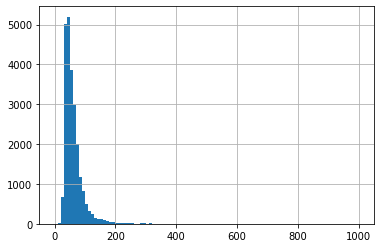

AxesSubplot(0.125,0.125;0.775x0.755)


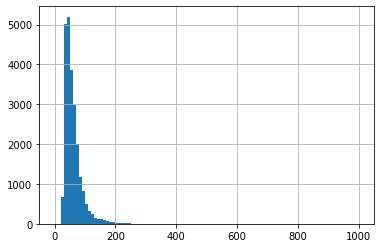

In [47]:
print(df['total_area'].hist(range= (0,1000), bins=100))
plt.show()
print(sample['total_area'].hist(range = (0,1000),bins = 100))
plt.show()

Удалим аномальные значения. Думаю это квадратура свыше 200 м/к.

In [48]:
for index, row in df.iterrows():
    if row['total_area'] > 200:
        df = df.drop(index)

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

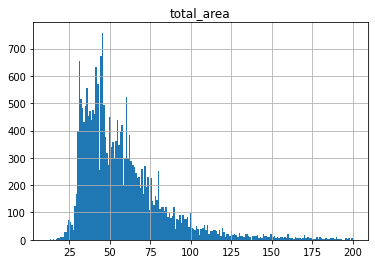

In [49]:
df.hist('total_area',bins = 200)

Общая площадь
- Самой распространенной общей площадью является от 44 до 45 м2
- Свыше 90 м2 и ниже 28 м2 количество обьявлений не превышает 100 обьявлений для каждой квадратуры

Посмотрим на Жилую площадь.

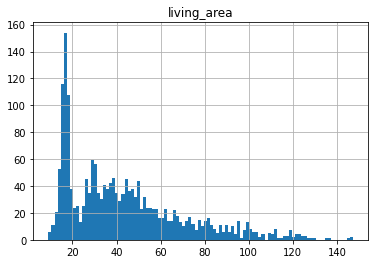

In [50]:
living_area_stat = df.pivot_table(index = 'total_area', values = 'living_area').hist(bins=100)

In [51]:
df['living_area'].describe()

count    21550.000000
mean        33.242188
std         17.365393
min          2.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        164.700000
Name: living_area, dtype: float64

Так же имеются аномальные значения, удаляем так же свыше 100 м/кв. Но для начала проверим сколько их.

In [52]:
sum(df['living_area'] >=100)

182

In [53]:
for index, row in df.iterrows():
    if row['living_area'] > 100:
        df = df.drop(index)

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

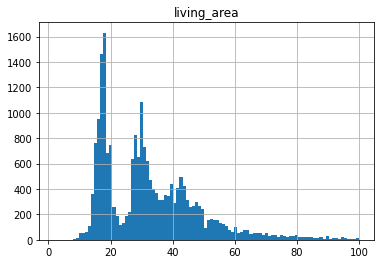

In [54]:
df.hist('living_area',bins = 100)

Жилая площадь
- Самой распространенной жилой площадью является от 17.5 до 18.5 м2
- Есть провал по кол-ву обьявлений между 20.5 м2 и 26.5 м2 жилой площади

Посмотрим на кухню

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

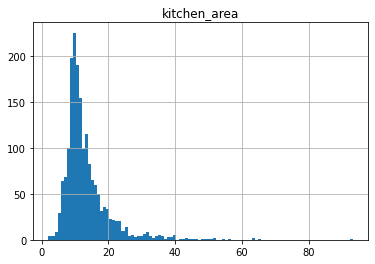

In [55]:
df.pivot_table(index = 'total_area', values = 'kitchen_area').hist(bins=100)

Имеются аномальные значениня,удалим квадратуру свыше 40.

In [56]:
df['kitchen_area'].describe()

count    21012.000000
mean        10.323434
std          5.304225
min          1.300000
25%          7.000000
50%          9.000000
75%         11.800000
max         93.200000
Name: kitchen_area, dtype: float64

In [57]:
for index, row in df.iterrows():
    if row['kitchen_area'] > 40:
        df = df.drop(index)

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

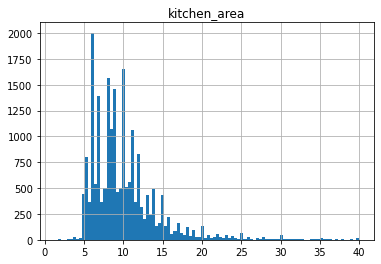

In [58]:
df.hist('kitchen_area', bins=100)

Площадь кухни
- Самыми распростроненными площадами кухни являются 6 м2 и 10 м2
- Ниже 5 м2 и свыше 20м2 количество обьявлений не превышает 100 обьявлений для каждой квадратуры

Посмотрим на Цену:

(0.43, 330.0)

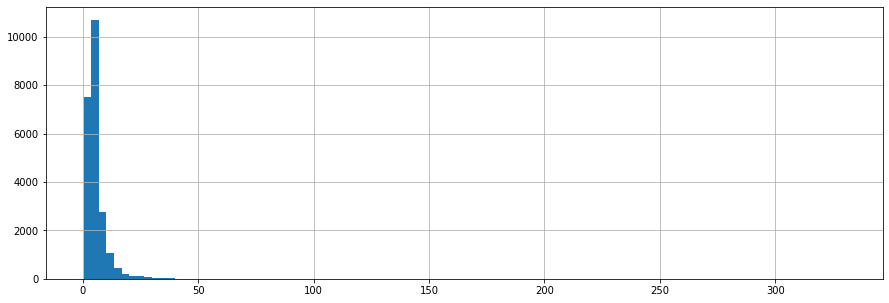

In [59]:
price_type = df['last_price']/1000000
price_type.hist(bins = 100, figsize=(15,5))
price_type.min(),price_type.max()

Цена объекта
- Наибольшее кол-во обьявлений в диапозоне от 3.5 до 4 миллионов
- Ниже 500к и выше 14М кол-во обьявлений не превышает 100 обьявлений для каждой квадратуры

Посмотрим на количество комнат:

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

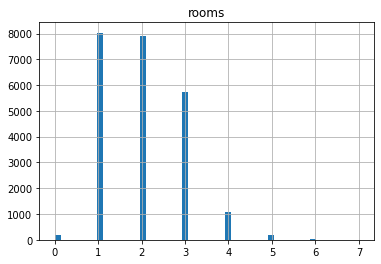

In [60]:
df.hist('rooms',bins =50)

In [61]:
df['rooms'].describe()

count    23157.000000
mean         2.008594
std          0.957900
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

Количество комнат
- Самые распрострененные обьявления имеют 1-2 комнаты
- Свыше 3 комнат кол-во обьявлений сильно уменьшается

Посмотрим на высоту потолков:

In [62]:
df['ceiling_height'].describe()

count    14139.000000
mean         2.714530
std          0.280109
min          1.030000
25%          2.500000
50%          2.650000
75%          2.800000
max         10.000000
Name: ceiling_height, dtype: float64

Удалим аномальное значение, свыше 8 метров потолок это черезчур много.

In [63]:
for index, row in df.iterrows():
    if row['ceiling_height'] >= 8:
        df = df.drop(index)

count    14134.000000
mean         2.712498
std          0.258054
min          1.030000
25%          2.500000
50%          2.650000
75%          2.800000
max          5.800000
Name: ceiling_height, dtype: float64

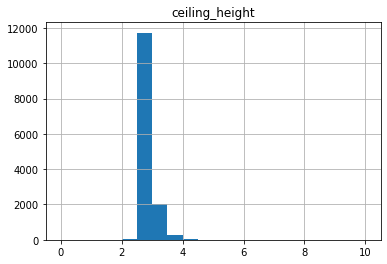

In [64]:
df.hist('ceiling_height',bins=20,range = (0,10))
df['ceiling_height'].describe()

Высота потолков
- Самой распростроненной высотой потолков является от 2.63 до 2.67 метров

Посмотрим на тип этажа квартиры:

<AxesSubplot:>

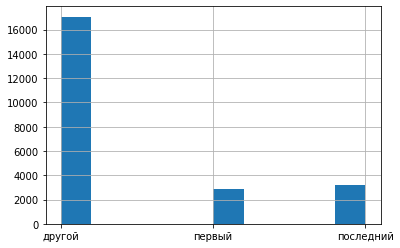

In [65]:
df['floor_status'].hist()

Этаж квартиры
- Основная масса квартир находится от второго этажа и выше до последнего

Посмотри на общее количество этажей в доме:

count    23037.000000
mean        10.714155
std          6.546927
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64

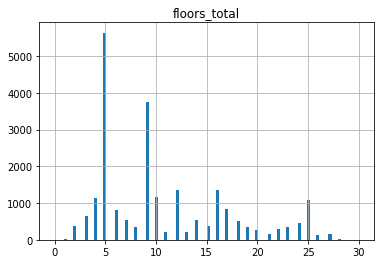

In [66]:
df.hist('floors_total',bins = 100, range=(0,30))
for index, row in df.iterrows():
    if row['floors_total'] >= 30:
        df = df.drop(index)
df['floors_total'].describe()

Общее количество этажей в доме
- Наибольшее кол-во квартир из обьявлений находятся в 5-ти и 9-ти этажных домах

Посмотрим на расстояние до центра города:

count    17626.000000
mean        14.383572
std          8.579995
min          0.210000
25%          9.630000
50%         13.220000
75%         16.380000
max         65.970000
Name: city_centers_nearest, dtype: float64

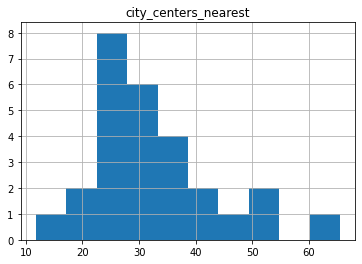

In [67]:
df.query('city_centers_nearest > 0').pivot_table(index ='locality_name',values='city_centers_nearest').hist()
df['city_centers_nearest'].describe()

Расстояние до центра города в метрах
- Наибольшее кол-во квартир находятся от 22 до 28 км от центра города

Посмотрим на расстояние до ближайшего аэропорта:

count    17606.000000
mean        28.876757
std         12.742189
min          0.000000
25%         18.450000
50%         26.940000
75%         37.410000
max         84.870000
Name: airports_nearest, dtype: float64

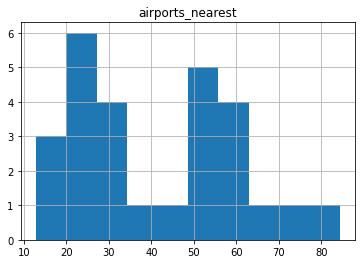

In [68]:
df.query('airports_nearest > 0').pivot_table(index ='locality_name',values='airports_nearest').hist()
df['airports_nearest'].describe()

Расстояние до ближайшего аэропорта
- Наибольшее кол-во квартир находятся в 20-28 км от ближайшего аэропорта

Посмотрим на расстояние до ближайшего парка:

<AxesSubplot:>

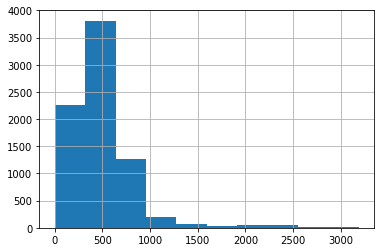

In [69]:
df['parks_nearest'].hist()

Расстояние до ближайшего парка
- В основном для всех квартир ближайших парк находится до 600-700 метров

Посмотрим день и месяц публикаций:

<AxesSubplot:>

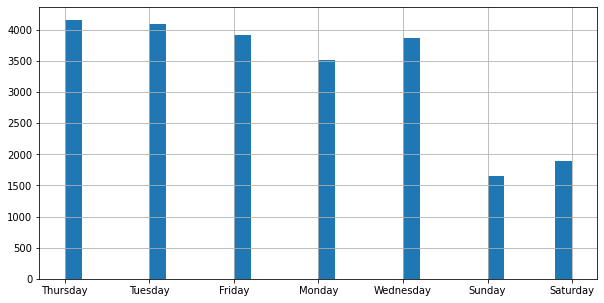

In [70]:
df['day_of_week_exposition'].hist(figsize = (10,5),bins = 30)

День публикации объявления
- В основном все публикации происходят в будние дни (скорее всего потому что риэлторы работают по будням)
- А публикации в выходные дни происходят от владельца

<AxesSubplot:>

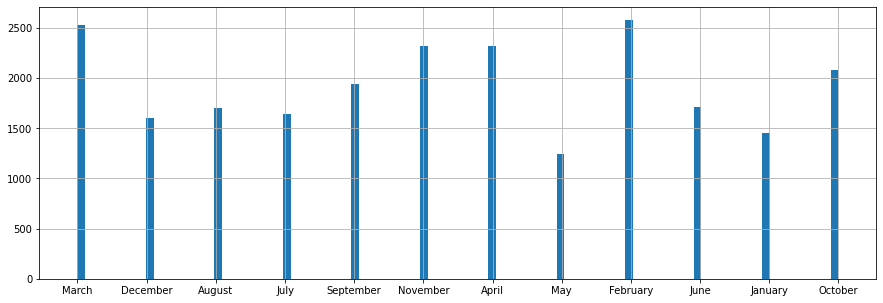

In [71]:
df['month_exposition'].hist(bins = 100, figsize = (15,5))

Месяц публикации объявления
- Март, Ноябрь, Апрель, Февраль самые активные месяца по публикациям

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Ты корректно подбираешь основные диапазоны, а также верно читаешь графики! Диапазоны для аномальных значений подобраны и удалены тоже верно!
</div>

Изучим, как быстро продавались квартиры:

count    20084.000000
mean       178.417596
std        217.382885
min          1.000000
25%         44.000000
50%         94.000000
75%        227.000000
max       1580.000000
Name: days_exposition, dtype: float64

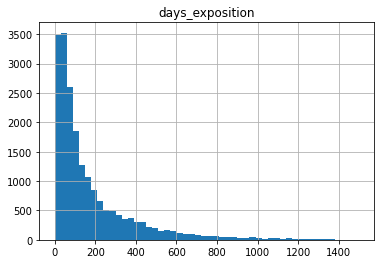

In [72]:
df[df['days_exposition']>0].hist('days_exposition',range= (0,1500),bins =50)
df['days_exposition'].describe()

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

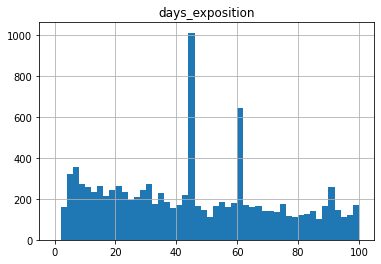

In [73]:
df[df['days_exposition']>0].hist('days_exposition',range= (0,100),bins =50)

In [74]:
df['days_exposition'].median()

94.0

In [75]:
df['days_exposition'].mean()

178.41759609639513

Вывод
- В среднем продажа квартиры занимала 180 дней
- Медианное значение продажи составляет 73 дней
- Продажи ниже медианного значения можно назвать необычно быстрыми, а выше среднего значения необычно долгими

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Если интересно, то можно посмотреть на диапазон от 0 до 100 дней. Там есть пики, которым можно найти очень логичное объяснение</div>
</div>

Да, это уже другое дело) спасибо)

Какие факторы больше всего влияют на общую (полную) стоимость объекта:

<AxesSubplot:xlabel='total_area'>

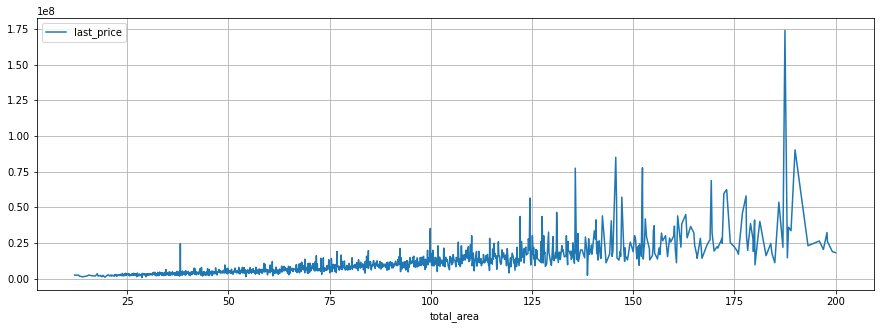

In [76]:
df.pivot_table(index = 'total_area', values = 'last_price', aggfunc = 'mean').plot(grid=True, figsize=(15,5))

<AxesSubplot:xlabel='living_area'>

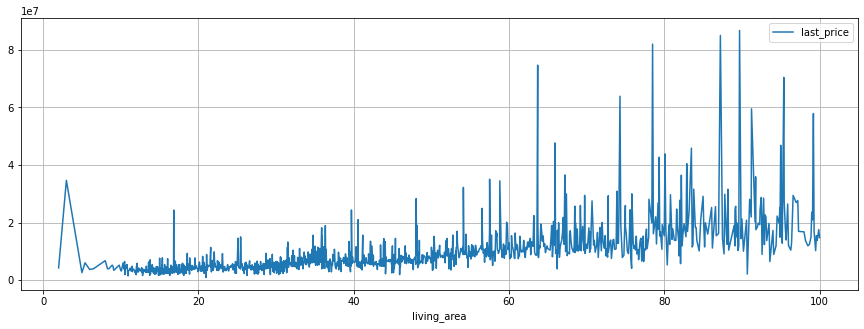

In [77]:
df.pivot_table(index = 'living_area', values = 'last_price', aggfunc = 'mean').plot(grid=True, figsize=(15,5))

<AxesSubplot:xlabel='kitchen_area'>

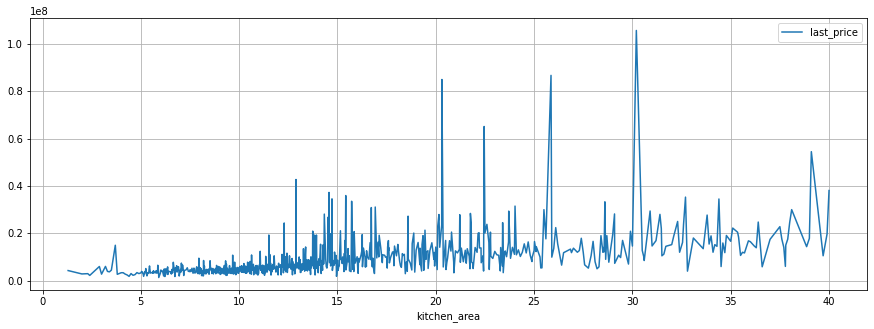

In [78]:
df.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = 'mean').plot(grid=True, figsize=(15,5))

<AxesSubplot:xlabel='rooms'>

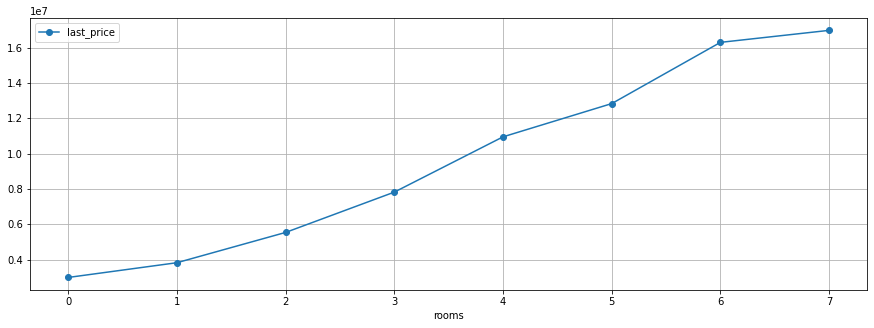

In [79]:
df.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'mean').plot(grid=True, figsize=(15,5),style = 'o-' )

<AxesSubplot:xlabel='floor_status'>

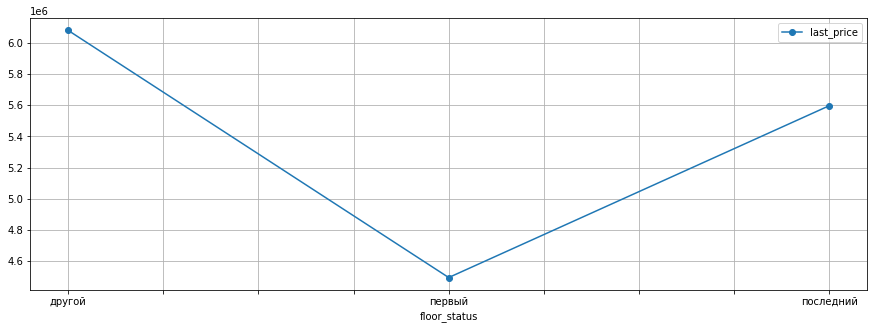

In [80]:
df.pivot_table(index = 'floor_status', values = 'last_price', aggfunc = 'mean').plot(grid=True, figsize=(15,5),style = 'o-' )

<AxesSubplot:xlabel='day_of_week_exposition'>

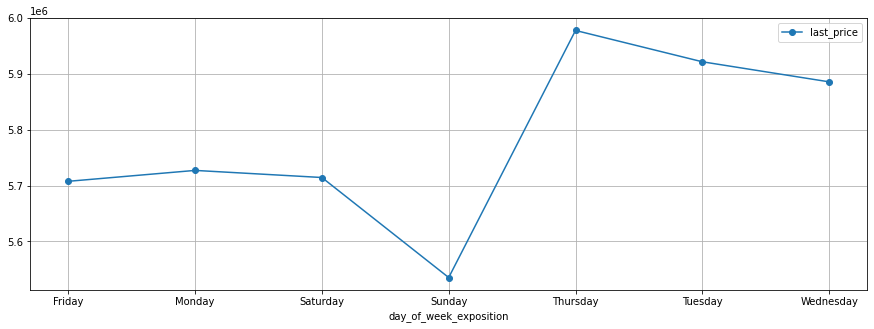

In [81]:
df.pivot_table(index = 'day_of_week_exposition', values = 'last_price', aggfunc = 'mean').plot(grid=True, figsize=(15,5),style = 'o-' )

<AxesSubplot:xlabel='month_exposition'>

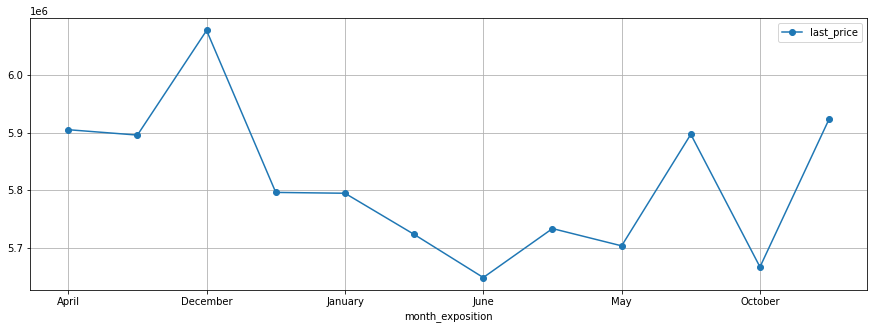

In [82]:
df.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = 'mean').plot(grid=True, figsize=(15,5),style = 'o-' )

<AxesSubplot:xlabel='year_exposition'>

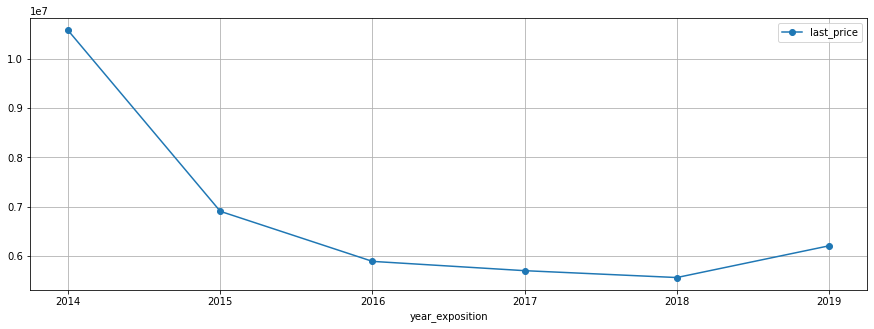

In [83]:
df.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = 'mean').plot(grid=True, figsize=(15,5),style = 'o-' )

Вывод
- Наибольшое влияние на общую стоимость обьекта оказывает Площадь (общая, жилая и кухонная)
- Также небольшое влияние оказывают кол-во комнат, тип этажа и год публикации
- День и месяц публикации практически не влияют на стоимость

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Зависимость цены изучена верно! Ещё тут можно использовать для визуализации pairplot из библиотеки seaborn 
    
    https://seaborn.pydata.org/generated/seaborn.pairplot.html
</div>

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 

In [84]:
local_group_data = df.pivot_table(index='locality_name', values=['total_area', 'last_price'], aggfunc='sum')
local_group_data['count'] = df.groupby('locality_name')['last_price'].count()
local_group_data['price_for_m'] = local_group_data['last_price']/local_group_data['total_area']

In [85]:
top_10 = local_group_data.sort_values(by='count', ascending=False).head(10)
top_10

,last_price,total_area,count,price_for_m
locality_name,,,,
Санкт-Петербург,106996988103,916046.36,15223,116803.027418
поселок Мурино,2024762930,24373.54,555,83072.172938
поселок Шушары,1803355999,23618.96,439,76352.049328
Всеволожск,1508048965,22296.83,398,67635.128626
Пушкин,2151666964,20585.68,359,104522.510988
Колпино,1302939246,17644.74,337,73842.926901
поселок Парголово,1459700459,16646.00,326,87690.764087
Гатчина,1063090360,15491.68,306,68623.310061
деревня Кудрово,1266013220,13924.95,299,90916.895213


<AxesSubplot:xlabel='locality_name'>

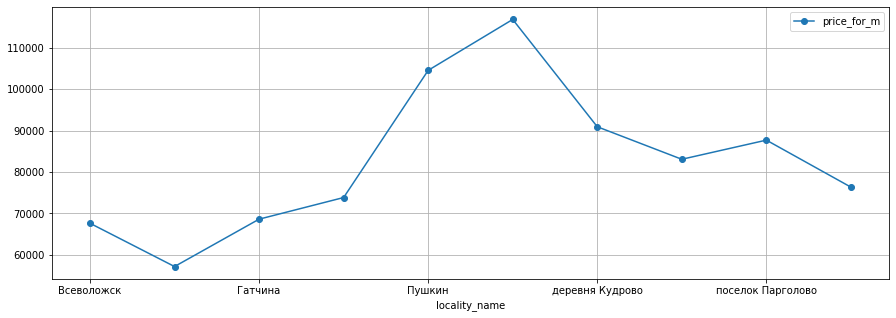

In [86]:
top_10 = top_10.sort_values(by='price_for_m', ascending=False)
top_10.pivot_table(index = 'locality_name', values = 'price_for_m').plot(grid=True, figsize=(15,5),style = 'o-')

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Для визуализации лучше использовать барплот
</div>

Теперь выделим квартиры в Санкт-Петербурге:

In [87]:
spb_data = df.loc[df['locality_name'] == 'Санкт-Петербург']
def price(row):
    if pd.notna(row['city_centers_nearest']):
        if row['city_centers_nearest']== 0:
            return row['last_price']
        else:
            return row['last_price']/row['city_centers_nearest']
            
spb_data['price_per_km'] = spb_data.apply(price, axis=1)
spb_data['price_per_km'].sum()/spb_data['price_per_km'].count()

1115879.150411531

<AxesSubplot:xlabel='city_centers_nearest'>

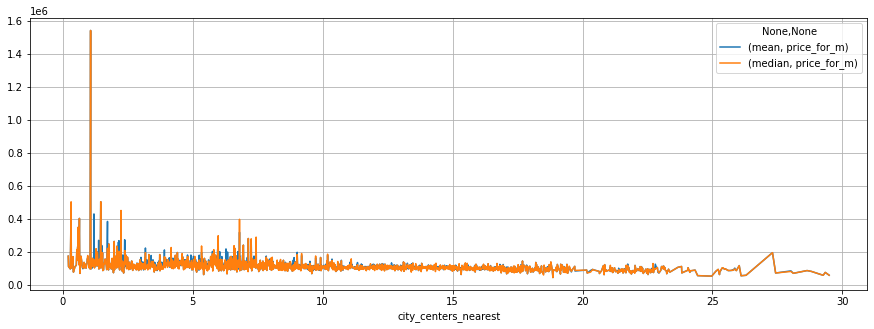

In [88]:
spb_data.pivot_table(index = 'city_centers_nearest', 
                     values = 'price_for_m',aggfunc = ['mean','median']).plot(grid = True ,figsize = (15,5))
                                                                  

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23121 entries, 0 to 23698
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23121 non-null  int64         
 1   last_price              23121 non-null  int64         
 2   total_area              23121 non-null  float64       
 3   first_day_exposition    23121 non-null  datetime64[ns]
 4   rooms                   23121 non-null  int64         
 5   ceiling_height          14121 non-null  float64       
 6   floors_total            23037 non-null  float64       
 7   living_area             21261 non-null  float64       
 8   floor                   23121 non-null  int64         
 9   is_apartment            23121 non-null  bool          
 10  studio                  23121 non-null  bool          
 11  open_plan               23121 non-null  bool          
 12  kitchen_area            20890 non-null  float6

In [90]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,pond_around_3000,ponds_nearest,days_exposition,day_of_week_exposition,month_exposition,year_exposition,floor_status,price_for_m
0,20,13000000,108.0,2019-03-07,3,2.7,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18.86,16.03,1.0,482.0,2.0,755.0,NaN,Thursday,March,2019,другой,120370.37
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,False,False,11.0,2.0,поселок Шушары,12.82,18.60,0.0,NaN,0.0,NaN,81.0,Tuesday,December,2018,первый,82920.79
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21.74,13.93,1.0,90.0,2.0,574.0,558.0,Thursday,August,2015,другой,92785.71
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28.10,6.80,2.0,84.0,3.0,234.0,424.0,Friday,July,2015,другой,408176.10
5,10,2890000,30.4,2018-09-10,1,NaN,12.0,14.4,5,False,False,False,9.1,0.0,городской поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,Monday,September,2018,другой,95065.79


### Общий вывод

В датасете, мы изучили данные объявлений по продаже недвижимости в городе Санк-Питербурге и ее окрестности.

    Выводы по предобработке данных:
    - ужасное состояния данных.
    - необходимо улучшить автозаполение где это предусмотрено
    - каким то образом помечать атуальные объявления вместо пропуска
    - данные в числах хранить в формате Int
    - устранить ошибку неявных дубликатов: например убрать собственно - ручное заполнение и сделать выборку по категориям
    - чтобы не допустить пропущенные значения в важных данных, установить обязательное заполнение, например: местоположение, фото,высота потолков.
    - не публиковать с аномальными занчениями, так как много времени потрачено на исправление этих данных.
    Выводы по исследовательскому анализу:
    - в основном вся недвижимость находится недалеко от центра города
    - в основном все объявления размещают в будние дни, возможно из-за того что реэлторы работают по будням
    - в основном недвижимость находится от 1 этажа до последнего
    - на сумму недвижимости влияют несколько факторов:
        1) чем выше квадратура, тем дороже недвижимость
        2) чем ближе недвижимость к центру города тем она дороже
        3) так же влияет этажность
        4) количество комнат
        5) квадратура кухни и жилой площади
    
    - согласно анализу, что из топ 10 населенных пунктов, в Санк_Питербурге самая дорогая стоимость жилья и квадратного метра.
    - средняя цена от центра за км составляет примерно 1 150 000.
    
    

Комментарий для Ревьювера:
   - Привет! Прошу не судить строго)) очень много времени ушло на его выполнение,замучился и запутался) спасибо)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Правок совсем немного)
</div>

<div class="alert alert-success">
<b>✔️ Итоговый комментарий ревьюера v2:</b>
<br>Все правки выполнены. Молодец!
<br>Я рад был поработать над проверкой твоей работы) В качестве дополнительного материала для изучения могу порекомендовать следующий ресурс:

	https://www.python-graph-gallery.com/
<br>В нем содержится большая библиотека графиков с готовым кодом, который можно использовать при работе.
<br>Поздравляю со сдачей проекта и желаю удачи в дальнейшем обучении! 😉    
</div>

привет Илья!